<a href="https://colab.research.google.com/github/jkranyak/705_MBA_FinalPaper/blob/main/705_MBA_FinalPaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# File path of the CSV
csv_file_path = "/content/Final_research_paper_titles_list.csv"

# Read the CSV file
combined_df = pd.read_csv(csv_file_path)

# Standardize column names and data
# Assume the columns we care about are 'Author' and 'Article'
if 'Author' not in combined_df.columns and 'Article' not in combined_df.columns:
    # Handle cases where author and article are in different columns or require renaming
    for col in combined_df.columns:
        if 'Author' in col:
            combined_df.rename(columns={col: 'Author'}, inplace=True)
        elif 'Article' in col:
            combined_df.rename(columns={col: 'Article'}, inplace=True)

# Display the combined DataFrame
combined_df.columns.tolist()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Title', 'Source', 'Author', 'Abstract', 'Unnamed: 4', 'Year', 'Web_Address']

In [2]:
# import pandas as pd

# # Prioritized columns to merge
# columns_to_merge = ['Link', 'URL', 'url']

# # Function to merge columns into one
# def merge_columns(row, columns):
#     for column in columns:
#         if pd.notnull(row[column]):
#             return row[column]
#     return None

# # Create a new column 'Web_Address' using the merge_columns function
# combined_df['Web_Address'] = combined_df.apply(merge_columns, columns=columns_to_merge, axis=1)

# # Drop the original columns
# combined_df.drop(columns=columns_to_merge, inplace=True)

# combined_df.info()

In [3]:
# # Display the BibTeX column of combined_df
# combined_df['BibTeX']


In [4]:
# import re
# import pandas as pd
# import numpy as np

# # Regular expression to match key-value pairs in BibTeX entries
# bibtex_pattern = r'(\w+)\s*=\s*\{([^}]+)\}'

# def extract_bibtex_info(bibtex):
#     """Extract key-value pairs from a BibTeX entry and return them as a dictionary."""
#     return dict(re.findall(bibtex_pattern, bibtex))

# # List of columns to fill
# columns_to_fill = ['Title', 'Source', 'Author', 'Abstract', 'Year', 'title', 'authors', 'date', 'source', 'summary', 'Web_Address']

# # Fill in the missing values from the BibTeX
# for index, row in combined_df.iterrows():
#     bibtex = row.get('BibTeX', None)
#     if pd.notnull(bibtex):
#         bibtex_info = extract_bibtex_info(bibtex)
#         for col in columns_to_fill:
#             if col not in combined_df.columns:
#                 combined_df[col] = None
#             if pd.isnull(row[col]) and col.lower() in bibtex_info:
#                 combined_df.at[index, col] = bibtex_info[col.lower()]

# # Drop the BibTeX column after filling
# combined_df.drop(columns=['BibTeX'], inplace=True)

# # Display the final DataFrame
# combined_df


In [5]:
# import pandas as pd
# import numpy as np

# # Merging 'title' and 'Title'
# combined_df['Title'] = combined_df['Title'].fillna(combined_df['title'])
# combined_df.drop(columns=['title'], inplace=True)

# # Merging 'authors' and 'Author'
# combined_df['Author'] = combined_df['Author'].fillna(combined_df['authors'])
# combined_df.drop(columns=['authors'], inplace=True)

# # Merging 'Abstract' and 'summary'
# combined_df['Abstract'] = combined_df['Abstract'].fillna(combined_df['summary'])
# combined_df.drop(columns=['summary'], inplace=True)


# # Merging 'Year' and 'date'
# combined_df['Year'] = combined_df['Year'].fillna(combined_df['date'])
# combined_df.drop(columns=['date'], inplace=True)


# # Merging 'Year' and 'date'
# combined_df['Source'] = combined_df['Source'].fillna(combined_df['source'])
# combined_df.drop(columns=['source'], inplace=True)

# # Display the final DataFrame
# combined_df


In [6]:
# import pandas as pd

# # Calculate the score for each row based on the number of non-null entries
# combined_df['score'] = combined_df.count(axis=1)

# # Define which columns should be used to identify duplicates
# duplicate_columns = ['Title', 'Author']

# # Sort by duplicate columns and score
# combined_df = combined_df.sort_values(by=duplicate_columns + ['score'], ascending=[True, True, False])

# # Drop duplicates, keeping the row with the highest score
# combined_df = combined_df.drop_duplicates(subset=duplicate_columns, keep='first')

# # Drop the score column
# combined_df.drop(columns=['score'], inplace=True)

# # Display the resulting DataFrame
# combined_df



In [7]:
# combined_df.info()


In [8]:
# import pandas as pd

# # Keep only rows where at least one URL column has a non-null value
# url_columns = ['Web_Address']
# combined_df = combined_df.dropna(subset=url_columns, how='all')

# # Display the updated DataFrame
# combined_df


In [9]:
# combined_df.to_csv('combined_df.csv', index=False)

In [10]:
pip install openai==0.28

In [23]:
import os
import openai
import re

# Read API key from file
exec(open("/content/OPENAI_API.txt").read())

# Initialize OpenAI client
openai.api_key = OPENAI_API_KEY


# Create the directory to save articles
directory = "/content/papers"
os.makedirs(directory, exist_ok=True)

# Function to clean file names
def clean_filename(title):
    # Remove special characters and whitespace
    title = re.sub(r'[^\w\s-]', '', title).strip()
    # Replace whitespace with underscores
    return re.sub(r'\s+', '_', title)

# Deduplicate the DataFrame
combined_df.drop_duplicates(subset=['Title'], inplace=True)

# Function to fetch and save articles using gpt-4-turbo
def fetch_and_save_article(title, filename):
    try:
        response = openai.ChatCompletion.create(
            model="gpt-4-turbo",
            messages=[
                {"role": "user", "content": f"You are a Professional Researcher at a Global Think Tank. Generate an article for the following title: {title}.  if there is only an abstract, find the pdf link and open it. make sure you get the entire article"}
            ],
            max_tokens=2000,
            temperature=0.7
        )

        article_content = response.choices[0].message['content']

        with open(filename, 'w', encoding='utf-8') as file:
            file.write(article_content)

    except Exception as e:
        print(f"Error generating article for {title}: {e}")

# Generate and save articles
for index, row in combined_df.iterrows():
    title = row['Title'] or f"article_{index}"
    clean_title = clean_filename(title)
    filename = os.path.join(directory, f"{clean_title}.txt")
    if not os.path.exists(filename):  # Check if file already exists
        fetch_and_save_article(title, filename)


In [24]:
import os
import pandas as pd

# Directory where articles are saved
directory = "/content/papers"

# Prepare the data
data = []
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    with open(filepath, 'r', encoding='utf-8') as file:
        text = file.read()
        data.append({"Title": filename, "Text": text})

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a .tab file
df.to_csv("/content/articles_for_orange.tab", sep='\t', index=False)


In [25]:
!pip install orange3

In [26]:
import shutil

# Specify the directory you want to compress
directory = "/content/research_papers"

# Compress the directory into a ZIP file
shutil.make_archive(directory, 'zip', directory)

# Provide a link to download the file
from google.colab import files
files.download(f"{directory}.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download("stopwords")
nltk.download("punkt")

# Load data
data = pd.read_csv("/content/articles_for_orange.tab", delimiter="\t")

# Preprocess text
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    return " ".join(tokens)

data["Text"] = data["Text"].apply(preprocess_text)

# Save processed data back to .tab file
data.to_csv("/content/processed_articles_for_orange.tab", sep="\t", index=False)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
import Orange

# Load the data from the preprocessed .tab file
data = Orange.data.Table("/content/processed_articles_for_orange.tab")


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import nltk
from nltk.corpus import stopwords
import Orange

nltk.download('stopwords')

# Load the data
data = Orange.data.Table("/content/processed_articles_for_orange.tab")

# Convert Orange Table to Pandas DataFrame
df = pd.DataFrame(data.X, columns=data.domain.attributes)
df["Text"] = data[:, "Text"].metas.flatten()

# Prepare custom stopwords
custom_stopwords = list(set(stopwords.words("english")) | {
    "artificial intelligence", "ai", 'xai', 'also',
    "global organizations", "corporate strategies", "organizational policy",
    "impact", "effect", "consequence", "influence",
    "qualitative research", "meta-analysis", "thematic analysis"
})

# Prepare the text data
texts = df["Text"].tolist()
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=custom_stopwords)
dtm = vectorizer.fit_transform(texts)

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(dtm)

# Display topics
for index, topic in enumerate(lda_model.components_):
    print(f"Topic #{index}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['analysis', 'artificial', 'corporate', 'global', 'intelligence', 'meta', 'organizational', 'organizations', 'policy', 'qualitative', 'research', 'strategies', 'thematic'] not in stop_words.
  warnings.warn(


Topic #0:
['data', 'decision', 'systems', 'agile', 'transparency', 'financial', 'making', 'explanations', 'models', 'model']
Topic #1:
['data', 'technologies', 'use', 'development', 'sustainability', 'social', 'personal', 'ethical', 'sustainable', 'identity']
Topic #2:
['challenges', 'efficiency', 'businesses', 'technologies', 'integration', 'making', 'decision', 'strategic', 'data', 'business']
Topic #3:
['development', 'job', 'organizational', 'future', 'employee', 'human', 'work', 'ethical', 'workforce', 'hr']
Topic #4:
['frameworks', 'international', 'data', 'technologies', 'systems', 'development', 'global', 'challenges', 'governance', 'ethical']


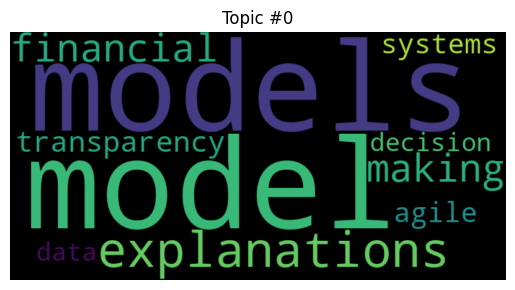

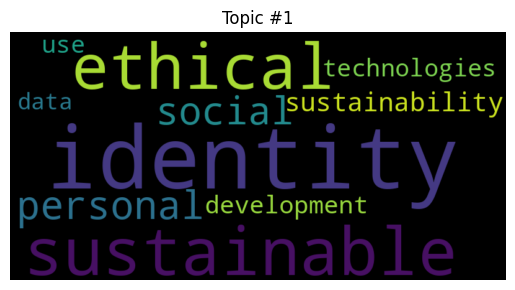

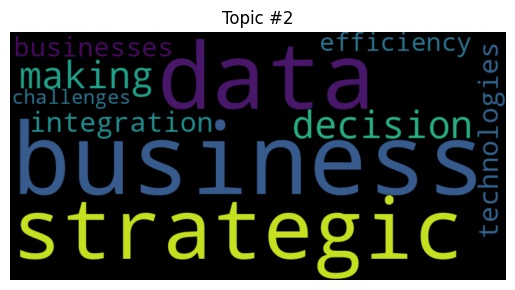

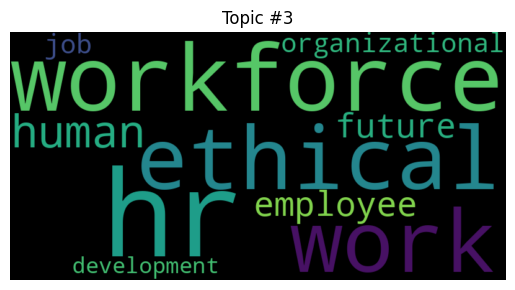

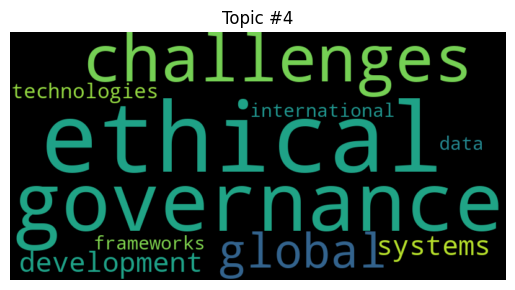

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word clouds for each topic
for index, topic in enumerate(lda_model.components_):
    plt.figure()
    word_freqs = {vectorizer.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[-10:]}
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freqs)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic #{index}")
    plt.show()


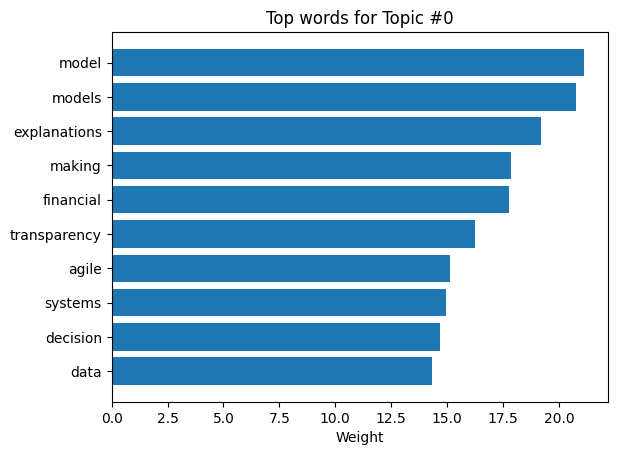

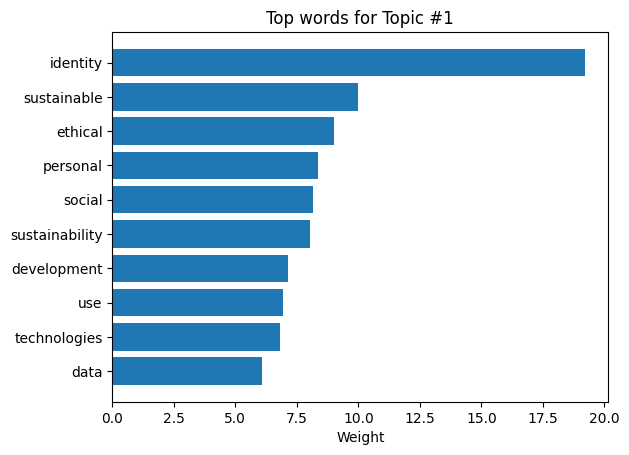

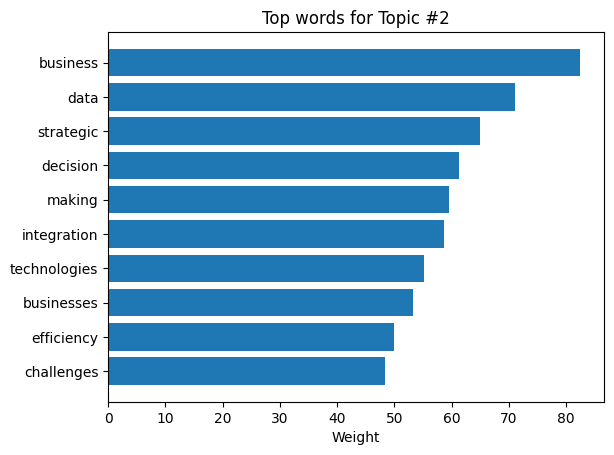

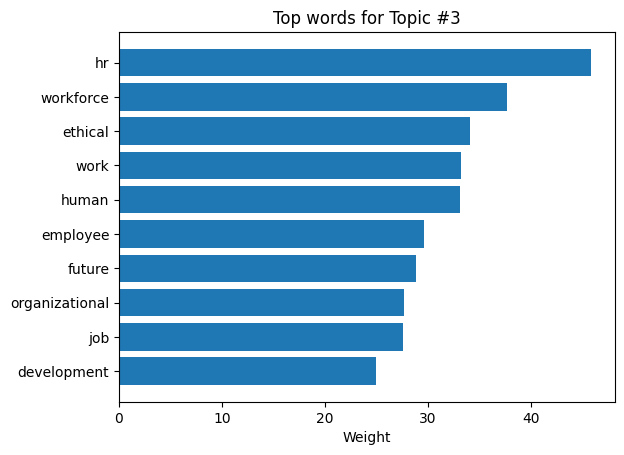

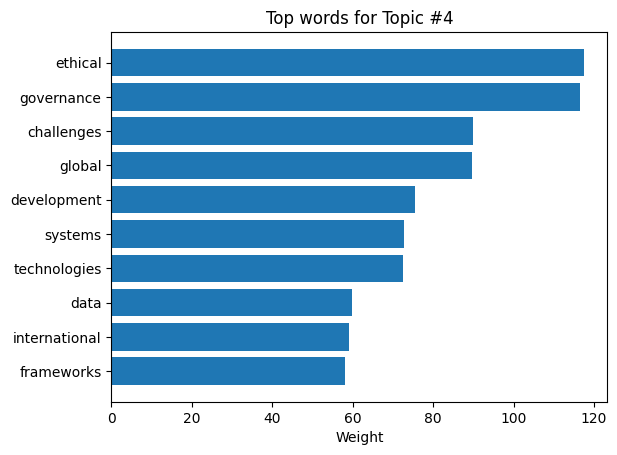

In [31]:
import numpy as np

# Generate bar charts for each topic
for index, topic in enumerate(lda_model.components_):
    plt.figure()
    top_indices = topic.argsort()[-10:]
    top_features = [vectorizer.get_feature_names_out()[i] for i in top_indices]
    top_weights = [topic[i] for i in top_indices]
    y_pos = np.arange(len(top_features))

    plt.barh(y_pos, top_weights, align='center')
    plt.yticks(y_pos, top_features)
    plt.xlabel("Weight")
    plt.title(f"Top words for Topic #{index}")
    plt.show()


In [33]:
import openai
import os

openai.api_key = OPENAI_API_KEY

# Function to code a document with custom stopwords
def code_document_with_stopwords(content):
    stopwords = [
        "artificial intelligence", "AI", "global organizations", "corporate strategies",
        "organizational policy", "impact", "effect", "consequence", "influence",
        "qualitative research", "meta-analysis", "thematic analysis"
    ]
    stopword_prompt = f"Ignore these terms: {', '.join(stopwords)}.\n\n"
    prompt = f"Read the following document and identify key themes:\n\n{stopword_prompt}{content}"

    response = openai.ChatCompletion.create(
        model="gpt-4-turbo",
        messages=[
            {"role": "system", "content": "You are an expert thematic coder."},
            {"role": "user", "content": prompt}
        ]
    )
    return response.choices[0].message['content']

# Directory where files are saved
directory = "/content/papers"

# Iterate through the files and code them
results = {}
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    with open(filepath, 'r', encoding='utf-8') as file:
        content = file.read()
        themes = code_document_with_stopwords(content)
        results[filename] = themes

# Display the results
for filename, themes in results.items():
    print(f"File: {filename}\nThemes:\n{themes}\n")



File: The_Impact_of_Artificial_Intelligence_on_Corporate_Boards.txt
Themes:
### Identified Key Themes:

1. **Transformation in Decision-Making Processes:**
   The document highlights how AI technologies like machine learning and data analytics have revolutionized decision-making within corporate boards. These tools enable faster and more accurate data analysis, leading to more effective strategic planning and competitiveness.

2. **Enhancement of Risk Management:**
   AI aids in proactive risk management by predicting potential issues through data trends, thus helping boards mitigate financial, reputational, and operational risks. It also assists in navigating complex regulatory landscapes.

3. **Board Composition and Skill Set Evolution:**
   The integration of AI necessitates alterations in the composition and skills of corporate boards, advocating for an increased presence of tech-savvy directors who can effectively manage AI initiatives. There is a particular emphasis on revising b

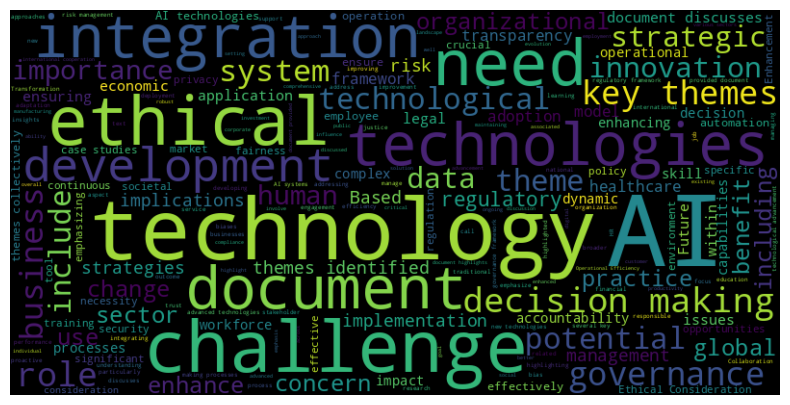

In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud for the themes
all_themes = " ".join(themes for themes in results.values())
wordcloud = WordCloud(width=800, height=400).generate(all_themes)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


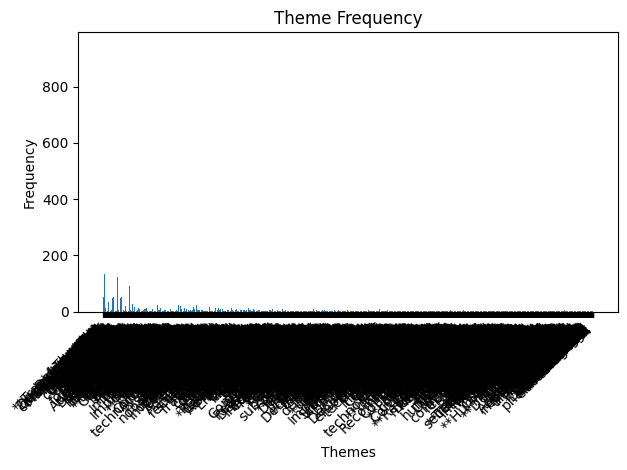

In [35]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the frequency of each theme
theme_counts = Counter(theme for themes in results.values() for theme in themes.split())

# Plot the bar chart
plt.bar(theme_counts.keys(), theme_counts.values())
plt.xlabel("Themes")
plt.ylabel("Frequency")
plt.title("Theme Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


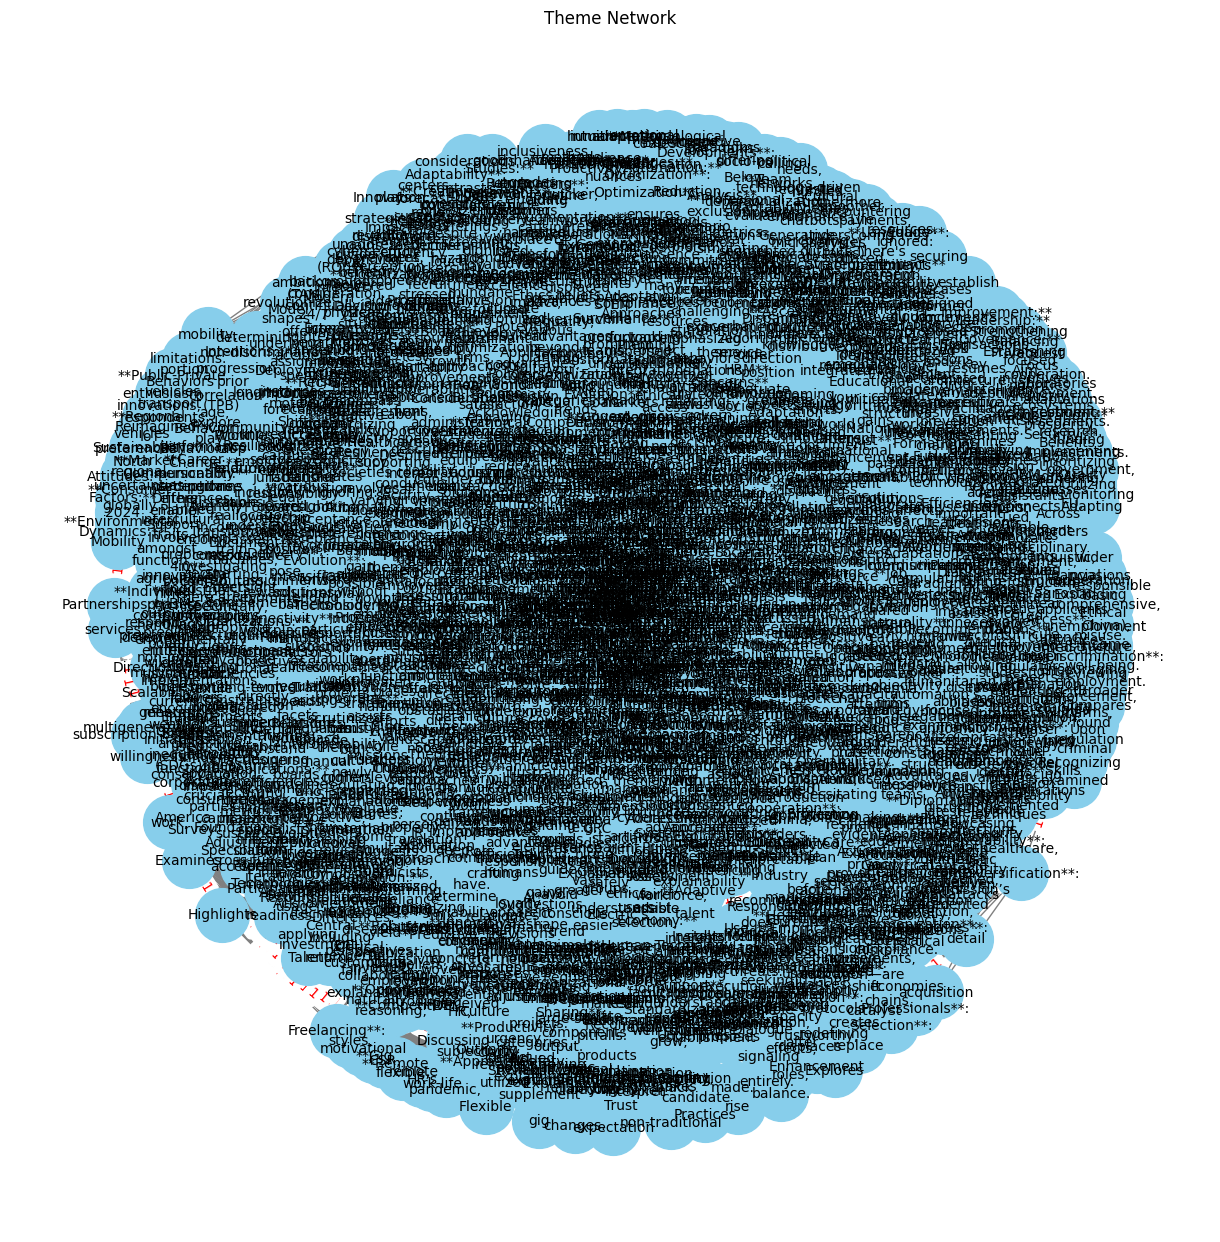

In [36]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Build the network
for themes in results.values():
    theme_list = themes.split()
    for i, theme1 in enumerate(theme_list):
        for theme2 in theme_list[i + 1:]:
            if G.has_edge(theme1, theme2):
                G[theme1][theme2]['weight'] += 1
            else:
                G.add_edge(theme1, theme2, weight=1)

# Draw the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1500, font_size=10, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d["weight"]}' for u, v, d in G.edges(data=True)}, font_color='red')
plt.title("Theme Network")
plt.show()
